In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

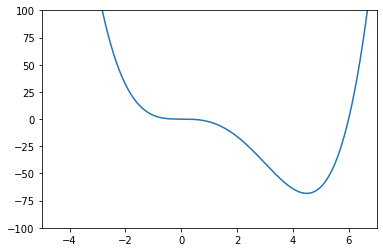

In [2]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [3]:
slope = np.zeros(1999)
for i in range(1999):
    dx = x[i+1]-x[i]
    dy = f(x[i+1])-f(x[i])
    slope[i] = dy/dx
print (slope)

[-2896.1022995 -2888.3160925 -2880.5436675 ...  1085.3628125  1089.5322675
  1093.7118925]


In [4]:
#random number로 댐핑 텀
n = 0
i = 0
while i < 2000:
    i = i + 1
    if abs(slope[n+1]) < abs(slope[n]):
        n = n + 1
    elif random.random() < 0.27:
        n = n + 4
    else:
        n = n - 1
    h = n

In [5]:
min(f(x)), f(x[h]), h

(-68.34375, -66.06829912000467, 1482)

In [6]:
#damping term삭제하고 조금 더 돌려서 최적화
n = h
i = 0
while i < 2000:
    i = i + 1
    if abs(slope[n+1]) < abs(slope[n]):
        n = n + 1
    else:
        n = n - 1
    h = n

In [7]:
min(f(x)), f(x[h]),h

(-68.34375, -68.33569791999975, 1448)

In [8]:
from sklearn import datasets

In [9]:
diabetes=datasets.load_diabetes()

In [10]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [11]:
# BMI로 분석
x = diabetes.data[:,2]
y = diabetes.target[:]

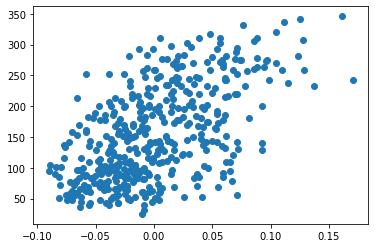

In [12]:
plt.scatter(diabetes.data[:,2], diabetes.target)

In [13]:
#mean square error
y_hat = np.zeros(442)
def f(a,b,xi):
    return a*xi+b
def mse(a,b,y):
    for i in range(442):
        y_hat[i] = f(a,b,x[i])
    return np.mean((y_hat-y)**2)


In [14]:
d = 0.01
n = 0;
a,b = 940,150
while(n<2000):
    if(mse(a+d,b,y)>mse(a-d,b,y)):
        a=a-d
    else:
        a=a+d
    if(mse(a,b+d,y)>mse(a,b-d,y)):
        b = b-d
    else:
        b = b+d
    n = n + 1

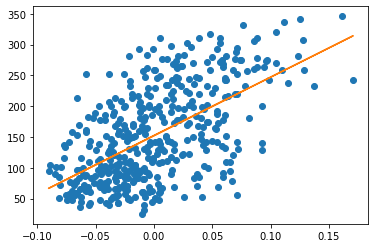

In [15]:
plt.plot(x,y,'o')
plt.plot(x,f(a,b,x))

In [16]:
mse(a,b,y), a, b

(3890.456627968229, 949.4399999999914, 152.13999999999805)

In [17]:
# 나이로 분석
x2 = diabetes.data[:,0]
y = diabetes.target[:]

In [18]:
def f(a,b,xi):
    return a*xi+b
def mse(a,b,y):
    for i in range(442):
        y_hat[i] = f(a,b,x2[i])
    return np.mean((y_hat-y)**2)
d = 0.01
n = 0;
a,b = 300,150
while(n<20000):
    if(mse(a+d,b,y)>mse(a-d,b,y)):
        a=a-d
    else:
        a=a+d
    if(mse(a,b+d,y)>mse(a,b-d,y)):
        b = b-d
    else:
        b = b+d
    n = n + 1

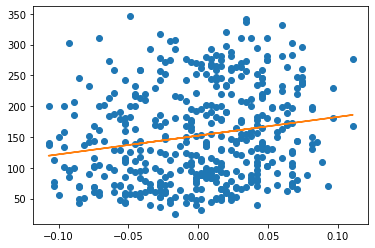

In [19]:
plt.plot(x2,y,'o')
plt.plot(x2,f(a,b,x2))

In [20]:
mse(a,b,y), a, b

(5720.547059683167, 304.1799999999962, 152.13999999999805)

In [21]:
# 혈압으로 분석

In [22]:
x3 = diabetes.data[:,3]
y = diabetes.target[:]

In [23]:
def f(a,b,xi):
    return a*xi+b
def mse(a,b,y):
    for i in range(442):
        y_hat[i] = f(a,b,x3[i])
    return np.mean((y_hat-y)**2)
d = 0.01
n = 0;
a,b = 710,150
while(n<20000):
    if(mse(a+d,b,y)>mse(a-d,b,y)):
        a=a-d
    else:
        a=a+d
    if(mse(a,b+d,y)>mse(a,b-d,y)):
        b = b-d
    else:
        b = b+d
    n = n + 1

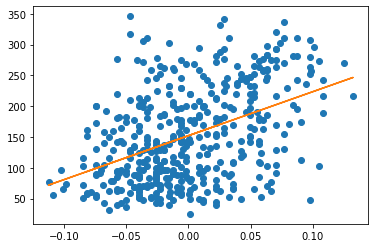

In [24]:
plt.plot(x3,y,'o')
plt.plot(x3,f(a,b,x3))

In [25]:
mse(a,b,y), a, b

(4774.102999904039, 714.7399999999957, 152.13999999999805)

In [26]:
y = diabetes.target[:]

In [27]:
from sklearn.linear_model import LinearRegression

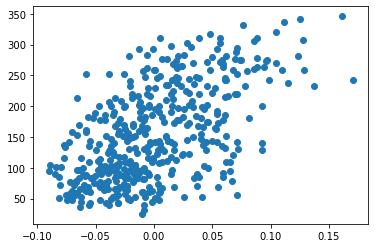

In [28]:
#BMI로 분석
X = [[i] for i in x]
Y = [[i] for i in y]
plt.plot(x,y,'o')

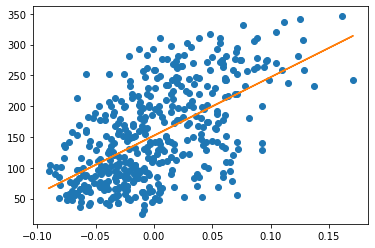

In [29]:
f = LinearRegression()
f.fit(X,Y)
a,b = f.coef_,f.intercept_
plt.plot(x,y,'o')
plt.plot(x,f.predict(X))

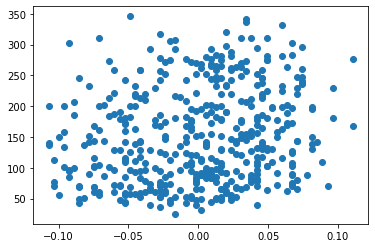

In [30]:
#나이로 분석
X = [[i] for i in x2]
Y = [[i] for i in y]
plt.plot(x2,y,'o')

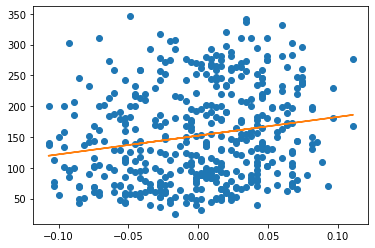

In [31]:
f = LinearRegression()
f.fit(X,Y)
a,b = f.coef_,f.intercept_
plt.plot(x2,y,'o')
plt.plot(x2,f.predict(X))

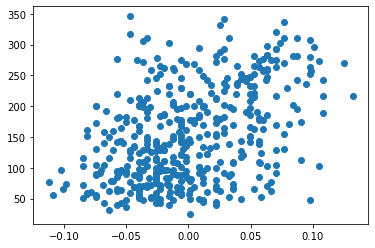

In [32]:
#혈압으로 분석
X = [[i] for i in x3]
Y = [[i] for i in y]
plt.plot(x3,y,'o')

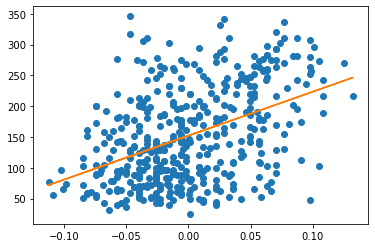

In [33]:
f = LinearRegression()
f.fit(X,Y)
a,b = f.coef_,f.intercept_
plt.plot(x3,y,'o')
plt.plot(x3,f.predict(X))